# Introduction to Data Visualization with Python

Data visualization is a very important discipline in data science and analytics, as well as many other academic disciplines.

It is very important to understand how to display data in a "good" way so that you as a data scientist or analyst can understand that data, see patterns, trends and correlation which otherwise would not be obvious

It is also a great way to show, results or analysis, experiements and investigations to stakeholders which might not have the expertise in understanding data that you have.

Python has many good packages which allow you to create, basic, interactive and even highly customised plots. We shall explore some of them here. 

 * Pandas Visualization: An Easy to use interface built on Matlibplot. We saw some of this in the "introduction to Pandas" Lesson
 * Seaborn: high-level interface, great default styles
 * Matplotlib: low level, provides lots of freedom
 * Plotly: can create interactive plots

### Setup

In [37]:
import pandas as pd
import seaborn as sns

import the data, we shall use the Titanic data again

In [65]:
df = pd.read_csv('./data/titanic.csv')
flights = pd.read_csv('./data/flight_data.csv')

### Pandas Visualization

With pandas there is a very useful plotting interface which is easy to use. It allows some basic customization and is useful when you want to look quickly at some data you already have stored in a pandas dataframe.

There are two ways in which you can use the pandas plot function.

<AxesSubplot:title={'center':'Fares paid by Titanic Passengers'}, ylabel='Frequency'>

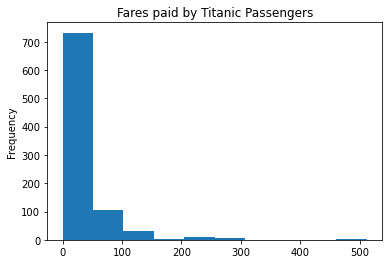

In [4]:
df['Fare'].plot(kind='hist', title='Fares paid by Titanic Passengers')

<AxesSubplot:title={'center':'Fares paid by Titanic Passengers'}, ylabel='Frequency'>

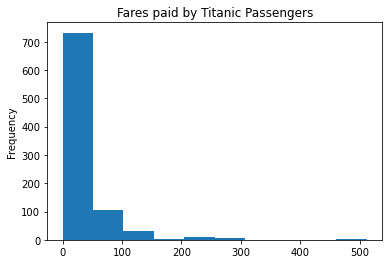

In [6]:
df['Fare'].plot.hist(title='Fares paid by Titanic Passengers')

There are a number of different types of plots you can create:
    
* ‘line’ : line plot (default)

* ‘bar’ : vertical bar plot

* ‘barh’ : horizontal bar plot

* ‘hist’ : histogram

* ‘box’ : boxplot

* ‘kde’ : Kernel Density Estimation plot

* ‘density’ : same as ‘kde’

* ‘area’ : area plot

* ‘pie’ : pie plot

* ‘scatter’ : scatter plot (DataFrame only)

* ‘hexbin’ : hexbin plot (DataFrame only)    

NB - Don't use pie charts 

There are a number of arguments that can be added to a plot through pandas. The full documentation can be found here :- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html

Lets add some more arguments to a plot to see how these work.

<AxesSubplot:title={'center':'Fares vs Age'}, xlabel='The Age of Passengers', ylabel='The Fares paid by passengers'>

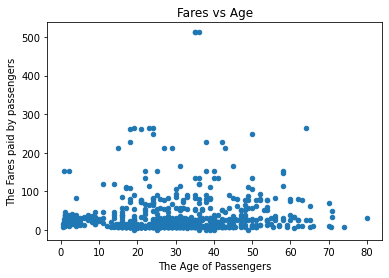

In [13]:
df.plot(kind='scatter', 
        x='Age', 
        y='Fare', 
        title='Fares vs Age',
        xlabel='The Age of Passengers',
        ylabel='The Fares paid by passengers')

We can also increase the size of the plot, using the figure argument. In some situations this is needed to get a better view of the data.

<AxesSubplot:title={'center':'Fares vs Age'}, xlabel='The Age of Passengers', ylabel='The Fares paid by passengers'>

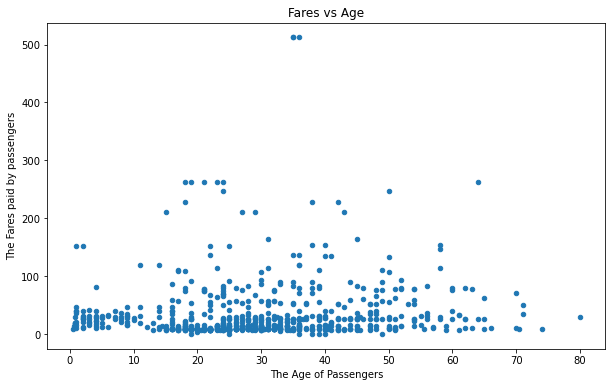

In [16]:
df.plot(kind='scatter', 
        x='Age', 
        y='Fare', 
        title='Fares vs Age',
        xlabel='The Age of Passengers',
        ylabel='The Fares paid by passengers',
        figsize=(10, 6))

We can also create multiple plots at once from a dataframe

In [18]:
df_sub = df[['Pclass', 'Age', 'Fare']]

array([[<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>]], dtype=object)

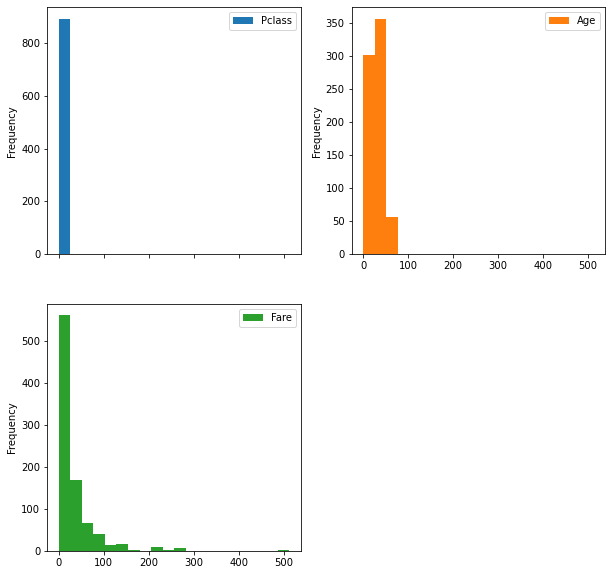

In [22]:
df_sub.plot.hist(subplots=True, layout=(2,2), figsize=(10, 10))

The `subplots` argument specifies that we want a separate plot for each feature and the `layout` specifies the number of plots per row and column.

Lets look at a bar char

<AxesSubplot:title={'center':'A Bar plot of PClass'}, xlabel='PClass', ylabel='Passenger Count'>

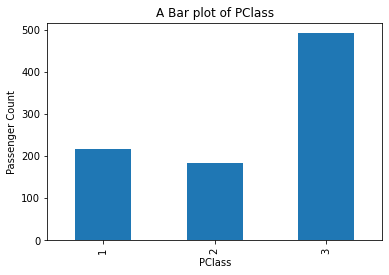

In [26]:
df['Pclass'].value_counts().sort_index().plot.bar(title='A Bar plot of PClass', 
                                                  xlabel='PClass', 
                                                  ylabel='Passenger Count')

We can also plot other metric than the counts

<AxesSubplot:title={'center':'A Bar plot of the mean Age of passenger per class PClass'}, xlabel='PClass', ylabel='mean Age of Passenger'>

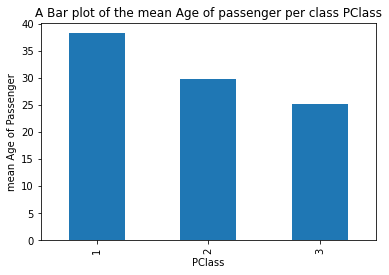

In [29]:
df.groupby("Pclass").Age.mean().sort_values(ascending=False)[:5].plot.bar(title='A Bar plot of the mean Age of passenger per class PClass', 
                                                                          xlabel='PClass', 
                                                                          ylabel='mean Age of Passenger')

### Seaborn

Seaborn is python library which is built on Matlibplot and offers a lot, it allows you to create "nice" plots in one line of code. It also work very well with pandas dataframe.

For continous data we can create really nice distribution plots

C:\Users\Stephen.saidani\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


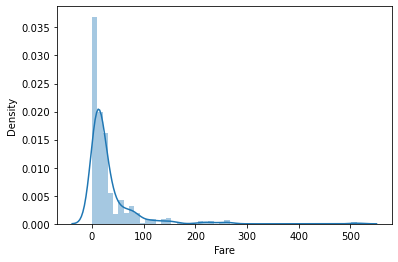

In [38]:
ax = sns.distplot(df.Fare)

We can create nice bar plots with easy as well

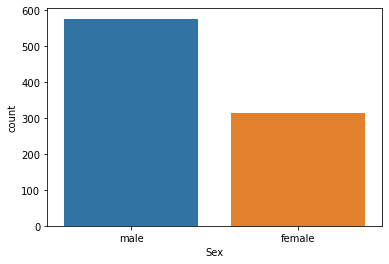

In [39]:
ax = sns.countplot(x="Sex", data=df)

In [40]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Another really useful plot that can created is a boxplot. A box plots visually show the distribution of numerical data and skewness

C:\Users\Stephen.saidani\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


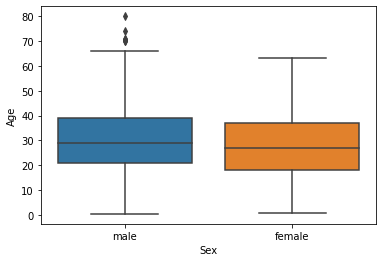

In [41]:
ax = sns.boxplot('Sex', 'Age', data=df)

Another really good plot which seaborn gives you in your arsenal is a `pairplot`, this allows you to plot data of all columns in a dataframe

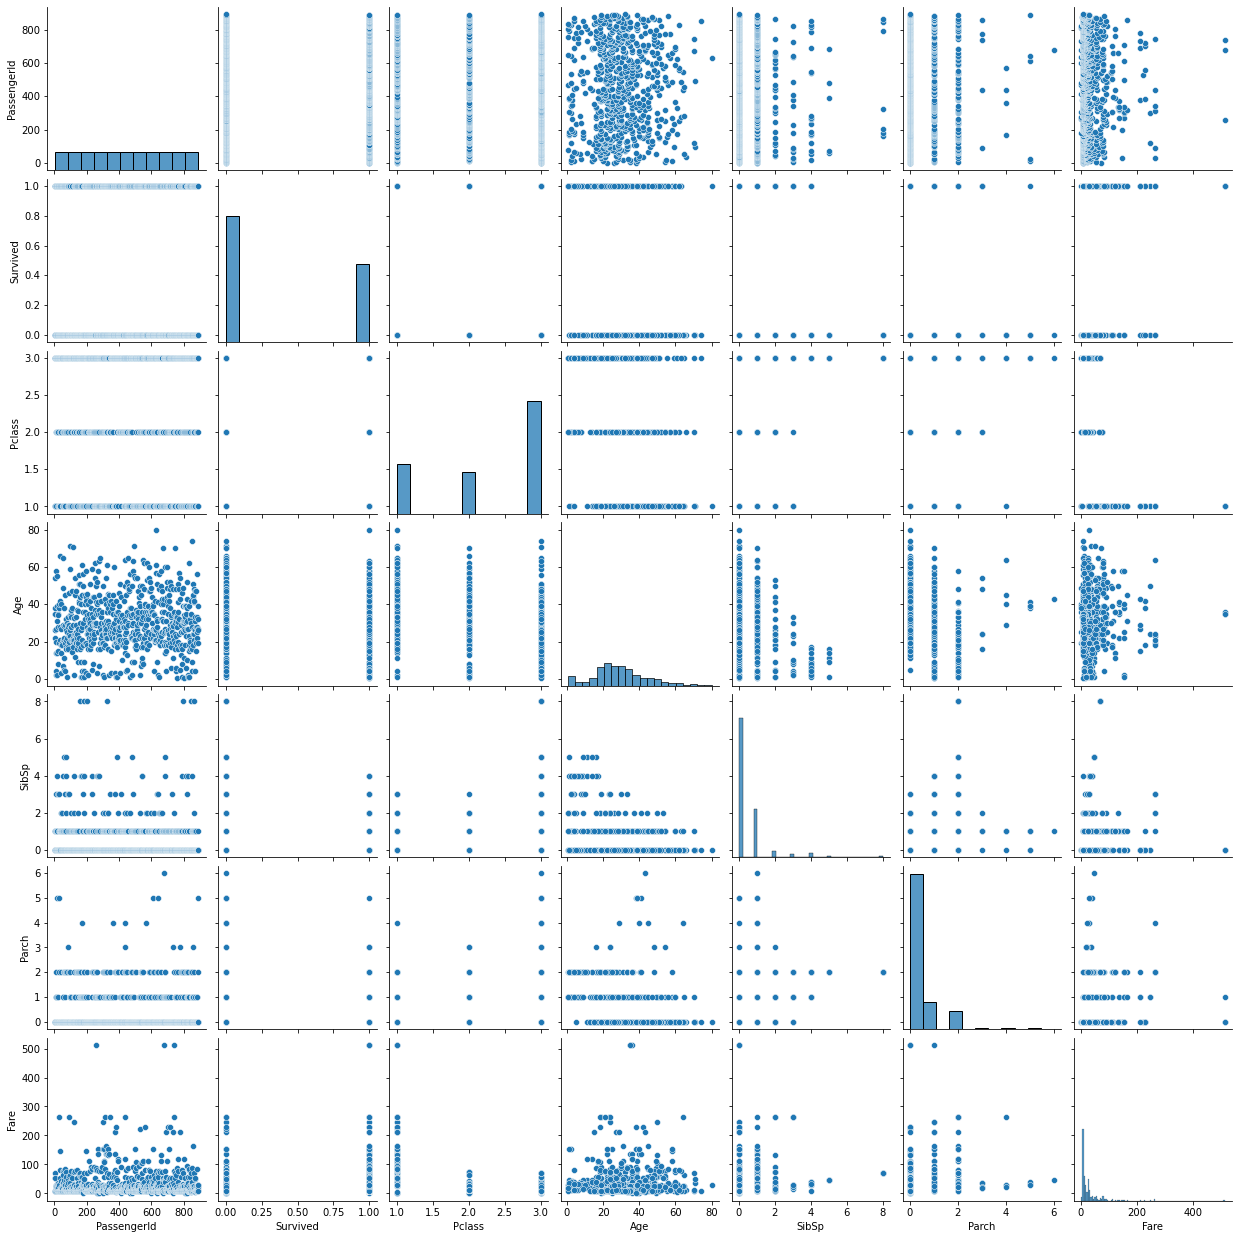

In [47]:
ax = sns.pairplot(df)

NB - this is probably not the best data to show this

We can also split, the data with a colour to show a variable and set it as a `palette`

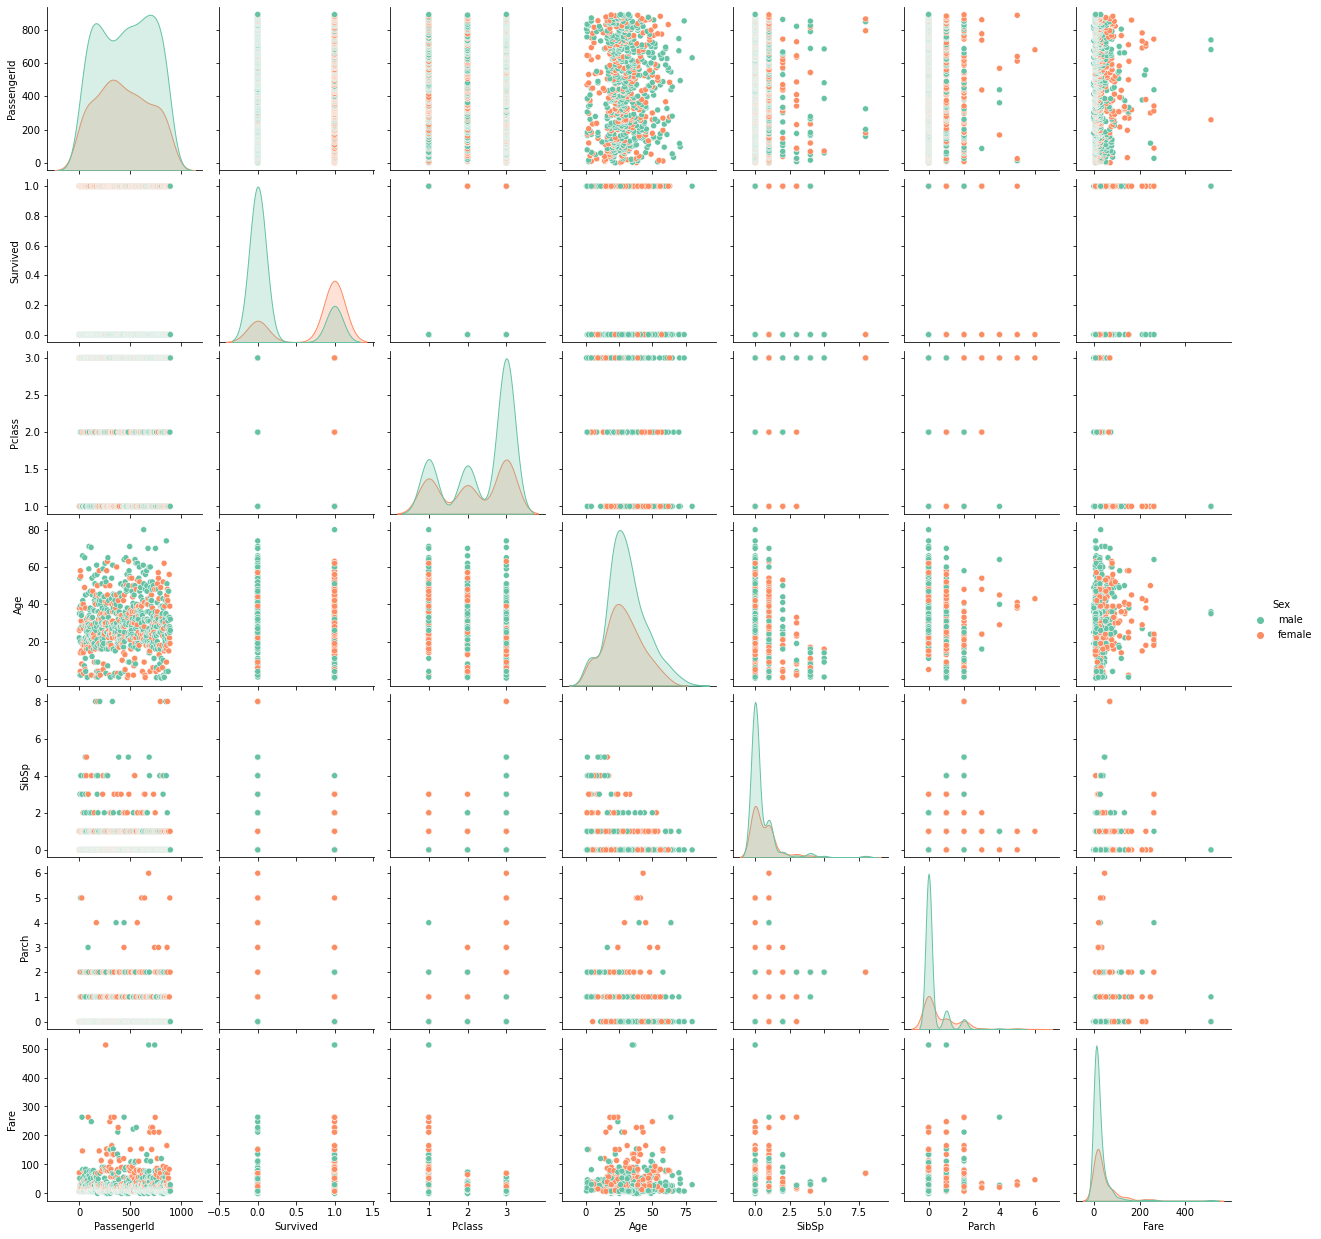

In [48]:
ax = sns.pairplot(df, hue="Sex",  palette="Set2")

We can also create heatmaps.

In [50]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


We are going to use the flight data to create a heat map

We need to pivot the data to do this which can be done as follows

In [66]:
flights = flights.pivot("month", "year", "passengers")

In [67]:
flights

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Apr,129,135,163,181,235,227,269,313,348,348,396,461
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Dec,118,140,166,194,201,229,278,306,336,337,405,432
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Mar,132,141,178,193,236,235,267,317,356,362,406,419
May,121,125,172,183,229,234,270,318,355,363,420,472


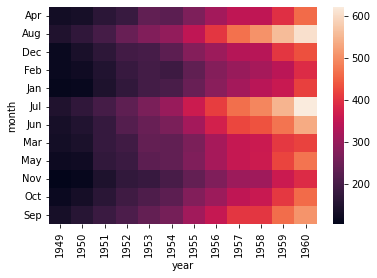

In [68]:
ax = sns.heatmap(flights)

We can also change the "icons" used in a plot

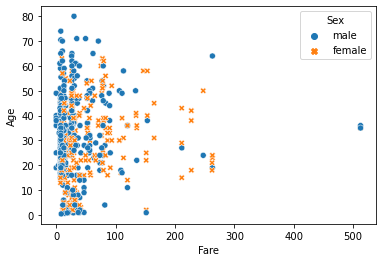

In [79]:
ax = sns.scatterplot(x="Fare", y="Age",hue='Sex', style="Sex", data=df)

The full documentation on seaborn can be found at https://seaborn.pydata.org/api.html

In [ ]:
This is only the basics of what can be done with data visualization in python, in later session once we have learnt more indepth aspects of python we shall return to 

## Exercises

1. Import the iris dataset and create a historgram for each of the numeric column (excluding `Id`) in one figure.

You can use the drop function to remove unneed columns  `iris_df.drop(['Species', 'Id'], axis=1)`

2. Use the iris data and create a box plot using seaborn of petal lenght per species. Then look at this plot and determine which species has the largest average petal length. Also identify which species has the most apparent outliers.